# [DeepSphere]: a spherical convolutional neural network
[DeepSphere]: https://github.com/SwissDataScienceCenter/DeepSphere

[Nathanaël Perraudin](https://perraudin.info), [Michaël Defferrard](http://deff.ch), Tomasz Kacprzak, Raphael Sgier

# Figure: pooling

In [1]:
import os; 
import healpy as hp; import numpy as np; 
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:100% !important; }</style>"))
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
pl = plt

In [3]:
pathfig = './figures/'
os.makedirs(pathfig, exist_ok=True)

In [4]:
def make_ball(map_test1, cmap=cm.gray_r, sub=None):
    cmap.set_under('w')
    cmap.set_bad('lightgray')
    dot_size=10
    rot = (0,30,345)
    vmin, vmax = -0.5, 1.5

#     map_test1_bw = map_test1.astype(np.float)/np.max(map_test1);
    hp.visufunc.orthview(map=map_test1, half_sky=True, title='', rot=rot, cmap=cmap, cbar=False, hold=True, nest=True, min=vmin, max=vmax, notext=True, sub=sub);
    theta, phi = hp.pix2ang(hp.npix2nside(len(map_test1)), range(len(map_test1)), nest=True);
    hp.projscatter(theta, phi, c='k', s=dot_size);
    hp.graticule();
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,15), local=True);
    hp.graticule(dmer=360,dpar=360,alpha=1, rot=(0,0,195), local=True);       
#     pl.savefig('test_fig1.pdf', bbox_inches='tight', transparent=True);

In [5]:
npix = hp.nside2npix(16)
map_data = np.arange(npix)
# map_data = hp.read_map('/Users/tomek/notes/160223_advanced_stats_methods/ASM_2017/ASM/Lectures/CMB/COM_CMB_IQU-smica_1024_R2.02_full.fits')
# map_data = hp.ud_grade(map_data, nside_out=16).astype(np.float32)
# map_data -= np.min(map_data)
# map_data /= np.max(map_data)

npix = hp.nside2npix(1)
map_select_1 = (np.arange(npix)==0).astype(np.float)
map_select_1[map_select_1==0] = hp.UNSEEN
map_select_2 = hp.ud_grade(map_select_1, nside_out=2, order_in='NESTED', order_out='NESTED')
map_select_4 = hp.ud_grade(map_select_1, nside_out=4, order_in='NESTED', order_out='NESTED')
# map_select_1[map_select_1!=hp.UNSEEN] = np.arange(np.count_nonzero(map_select_1!=hp.UNSEEN))
n_filled = float(np.count_nonzero(map_select_2!=hp.UNSEEN))
map_select_2[map_select_2!=hp.UNSEEN] = np.arange(n_filled, dtype=np.float64)/n_filled
n_filled = float(np.count_nonzero(map_select_4!=hp.UNSEEN))
map_select_4[map_select_4!=hp.UNSEEN] = np.arange(n_filled, dtype=np.float64)/n_filled

# map_select_2[map_select_2==hp.UNSEEN] = np.nan
# map_select_4[map_select_4==hp.UNSEEN] = np.nan

/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
saved ./figures/figure_pooling1.svg
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
saved ./figures/figure_pooling2.svg
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The inter

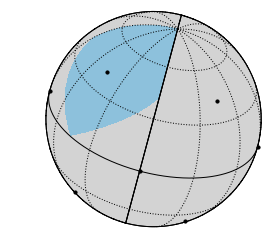

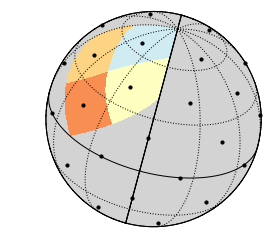

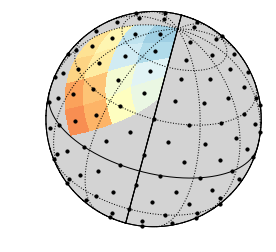

In [6]:
nx, ny = 3,1
# pl.figure()

# fig, ax = plt.subplots(ncols=nx, nrows=ny, figsize=(nx*5, ny*7))

# pl.subplot(ny,nx,1)
# pl.subplot(ny,nx,2)
# pl.axes(ax[1])
# make_ball(map_select_2, cmap=pl.cm.RdYlBu)
# pl.subplot(ny,nx,3)
# pl.axes(ax[2])

pl.figure()
# newax = pl.gcf().add_axes([0.1, 0.1, 0.8, 0.8],frameon=False)
# pl.axes(newax)
make_ball(map_select_1, cmap=pl.cm.RdYlBu)
filename_plot = os.path.join(pathfig,'figure_pooling1.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))

# pl.axes(ax[1])
pl.figure()
# newax = pl.gcf().add_axes([0.1, 0.4, 0.8, 0.8],frameon=False)
# pl.axes(newax)
make_ball(map_select_2, cmap=pl.cm.RdYlBu)
filename_plot = os.path.join(pathfig,'figure_pooling2.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))

# pl.axes(ax[0])
pl.figure()
# newax = pl.gcf().add_axes([0.1, 0.1, 0.8, 0.8],frameon=False)
# pl.axes(newax)
make_ball(map_select_4, cmap=pl.cm.RdYlBu)
filename_plot = os.path.join(pathfig,'figure_pooling3.svg')
pl.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))

# , sub=(ny, nx, 3)
# pl.subplots_adjust(wspace=0.01, hspace=0.01)

# import matplotlib.pyplot as plt

# newax = pl.gcf().add_axes([0.1, 0.1, 0.8, 0.8],frameon=False)
# print(newax)
# newax.plot([22, 50], [70,72], 'k-')
# pl.xlim(0,100)
# pl.ylim(0,100)
# pl.grid()
# pl.xticks([])
# pl.yticks([])
# newax.axis('equal')
# plt.show()
filename_plot = os.path.join(pathfig,'figure_pooling.pdf')
pl.savefig(filename_plot, bbox_inches='tight'); print('saved {}'.format(filename_plot))

In [7]:
import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose

In [8]:
lw=3
point2=(377,87)
point3=(603,72)

In [9]:
svg_fig = sc.Figure("22.5cm", "6.75cm",  
#     sc.Panel(sc.SVG("./figure_pooling1.svg").scale(1)).move('1cm', '1cm')
                    sc.SVG(os.path.join(pathfig, "figure_pooling3.svg")).scale(1).move(0,0),
                    sc.SVG(os.path.join(pathfig, "figure_pooling2.svg")).scale(1).move(250, 0),
                    sc.SVG(os.path.join(pathfig, "figure_pooling1.svg")).scale(1).move(500, 0),
                    sc.Line( ((122,80), point2), width=lw, color='darkred'),
                    sc.Line( ((148,93), point2), width=lw, color='darkred'),
                    sc.Line( ((153,71), point2), width=lw, color='darkred'),
                    sc.Line( ((124,107), point2), width=lw, color='darkred'),
                    
                    sc.Line( ((384,87), point3), width=lw, color='darkblue'),
                    sc.Line( ((396,44), point3), width=lw, color='darkblue'),
                    sc.Line( ((348,55), point3), width=lw, color='darkblue'),
                    sc.Line( ((337,105), point3), width=lw, color='darkblue')
                   )

svg_fig.save(os.path.join(pathfig, "figure_pooling_svg.svg"))
SVG(os.path.join(pathfig, 'figure_pooling_svg.svg'))

/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)
/home/defferra/miniconda3/envs/scnn/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 360 deg 0.00'.
The interval between meridians is 360 deg 0.00'.
saved ./figures/figure_pooling4.svg
saved ./figures/figure_pooling4.pdf


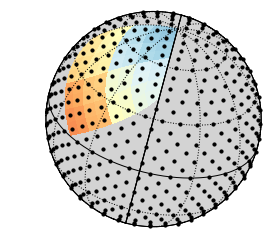

In [10]:
map_select_8 = hp.ud_grade(map_select_1, nside_out=8, order_in='NESTED', order_out='NESTED')
n_filled = float(np.count_nonzero(map_select_8!=hp.UNSEEN))
map_select_8[map_select_8!=hp.UNSEEN] = np.arange(n_filled, dtype=np.float64)/n_filled

make_ball(map_select_8, cmap=plt.cm.RdYlBu)
filename_plot = os.path.join(pathfig,'figure_pooling4.svg')
plt.savefig(filename_plot, bbox_inches='tight', transparent=True); print('saved {}'.format(filename_plot))
filename_plot = os.path.join(pathfig,'figure_pooling4.pdf')
plt.savefig(filename_plot, bbox_inches='tight'); print('saved {}'.format(filename_plot))